In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap

%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = 12, 9
plt.rcParams['font.size'] = 20

In [5]:
colors = ('red', 'green', 'blue', 'yellow')

In [6]:
cmap = ListedColormap(colors)

In [7]:
dfs = {}

for i, color in enumerate(colors):
    dfs[color] = pd.read_csv(color + '.csv')
    dfs[color]['label'] = i
    dfs[color]['label_name'] = color

df = pd.concat(dfs.values())

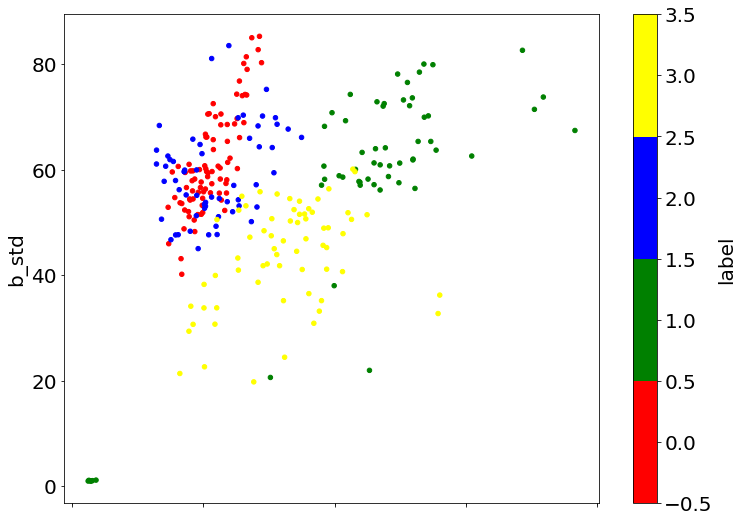

In [8]:
df.plot.scatter(x='g_std', y='b_std', c='label', cmap=cmap, vmin=-0.5, vmax=3.5)

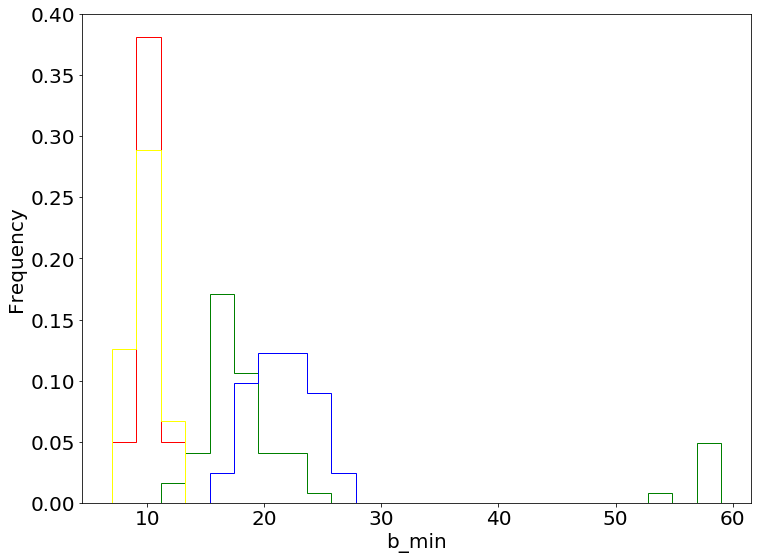

In [9]:
feature = 'b_min'

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for color in colors:
    ax.set_xlabel(feature)
    limits = [df[feature].min(), df[feature].max()]
    df.query('label_name == @color')[feature].plot.hist(range=limits, bins=25, histtype='step', color=color, normed=True)
    

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib

In [11]:
df_X = df.drop(['label', 'label_name'], axis=1) 
X = df_X.values
y = df.label.values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((202, 69), (68, 69), (202,), (68,))

In [19]:
model = RandomForestClassifier(n_estimators=50)
model.features = df_X.columns
model.labels = colors

In [20]:
model.fit(X_train, y_train);

In [21]:
prediction = model.predict(X_test)

accuracy_score(prediction, y_test)

1.0

In [23]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [17]:
df_feature = pd.DataFrame({
    'importance': model.feature_importances_,
    'name': df.drop(['label', 'label_name'], axis=1).columns}
)

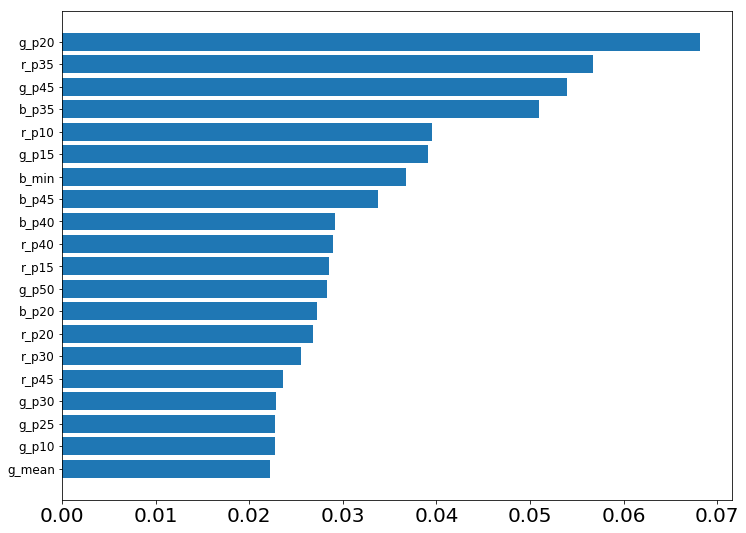

In [18]:
df_feature = df_feature.sort_values('importance').tail(20)
plt.barh(np.arange(len(df_feature)), df_feature.importance.values)
plt.yticks(np.arange(len(df_feature)), df_feature.name.values, size=12);